# Analysing Medical Data (Diabetes) 

In this dataset, columns as the following:

- Age and sex are self-explanatory
- BMI is body mass index
- BP is average blood pressure
- S1 through S6 are different blood measurements
- Y is the qualitative measure of disease progression over one year

In [1]:
# This project utilizes a small dataset of diabetes patients sourced from here.

url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import os


In [3]:
# Read the data into a Pandas DataFrame
# The values in the file are separated by tabs ('\t')
train = pd.read_csv('dataset.txt',sep='\t')

# Data exploration

In [4]:
print('Datashape of dataset: ',train.shape)
# The shape attribute returns a tuple representing the dimensions of the DataFrame (number of rows, number of columns)
train.head()
# Display the first few rows of the 'train' DataFrame

Datashape of dataset:  (442, 11)


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Data have 11 columns and 442 rows

In [5]:
# Display information about the 'train' DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


As you can see, type of the dataset is numeric 

In [6]:
# Check for missing values in the 'train' DataFrame
missing_data=train.isna().sum()
missing_data = missing_data[missing_data > 0] # Filter the missing data Series to include only columns with more than 0 missing values
missing_data

Series([], dtype: int64)

Compute mean values and variance for all values

In [7]:
data_mean=train.mean().reset_index() # Calculate the mean of each column in the 'train' DataFrame
data_var=train.var().reset_index() # Calculate the variance of each column in the 'train' DataFrame
data_std=train.std().reset_index() # Calculate the standard deviation of each column in the 'train' DataFrame
describe=data_mean.merge(data_var,on='index').merge(data_std,on='index') # Merge the three DataFrames (mean, variance, standard deviation) on the 'index' column
describe.columns=['Variable','Mean','Var','Std']
describe

,Variable,Mean,Var,Std
0,AGE,48.518100,171.846610,13.109028
1,SEX,1.468326,0.249561,0.499561
2,BMI,26.375792,19.519798,4.418122
3,BP,94.647014,191.304401,13.831283
4,S1,189.140271,1197.717241,34.608052
5,S2,115.439140,924.955494,30.413081
6,S3,49.788462,167.293585,12.934202
7,S4,4.070249,1.665261,1.290450
8,S5,4.641411,0.272892,0.522391
9,S6,91.260181,132.165712,11.496335


In [8]:
# Modify the 'SEX' column in the 'train' DataFrame
train.SEX=train.SEX.map({1:'MEN',2:'WOMEN'})

# Visualize

In [9]:
target = 'Y' # Set the target variable to 'Y'

# Define a function to categorize columns into numeric and categorical types
def col_dtypes(train, target):
    num_col = train.select_dtypes('number').columns.to_list() # Select numeric columns and convert them to a list
    cat_col = train.select_dtypes("object").columns.to_list() # Select categorical columns and convert them to a list

    num_col = [col for col in num_col if col not in [target]] # Remove the target variable from the numeric columns list

    return num_col, cat_col

num_col, cat_col = col_dtypes(train, target)

print(f'Num Cols:,{num_col}', end='\n\n')
print(f"Cat col:, {cat_col}")

Num Cols:,['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

Cat col:, ['SEX']


In [10]:
train["Y"].quantile([0,0.25,0.50,0.75,0.99]) # The quantile() method is used to compute the specified quantiles (0%, 25%, 50%, 75%, and 99%)

0.00     25.00
0.25     87.00
0.50    140.50
0.75    211.50
0.99    319.36
Name: Y, dtype: float64

Minimum Value (0.00): The minimum value in the 'Y' column is 25.00. This suggests that there are observations in the dataset with very low values, indicating a lower limit for the variable.

First Quartile (Q1, 0.25): 25% of the data falls below 87.00. This indicates that a quarter of the observations have 'Y' values less than 87.00.

Median (Q2 or 50%): The median 'Y' value is 140.50. This is the middle value in the dataset, suggesting that half of the observations have 'Y' values below 140.50, and the other half have values above.

Third Quartile (Q3, 0.75): 75% of the data falls below 211.50. This signifies that most of the observations (three-quarters) have 'Y' values less than 211.50.

99th Percentile (0.99): Only 1% of the data exceeds 319.36. This upper quantile value indicates the presence of potential outliers or extreme values in the upper tail of the 'Y' distribution.

In [11]:
# Create a new categorical column 'Y_range' in the 'train' DataFrame

train["Y_range"] = pd.cut(
    train["Y"],                   # Specify the column to be binned
    bins=np.array([-np.inf, 100, 150, 200, np.inf]),  # Define the bin edges
    labels=["0-100", "100-150", "150-200", "200+"]   # Assign labels to the bins
)

Categorical variables are often more interpretable than continuous ones. In this case, creating ranges such as "0-100," "100-150," etc., makes it easier to understand and communicate the levels of disease progression.

In [12]:
train.head() # Show the dataframe

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,Y_range
0,59,WOMEN,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,150-200
1,48,MEN,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,0-100
2,72,WOMEN,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,100-150
3,24,MEN,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,200+
4,50,MEN,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,100-150


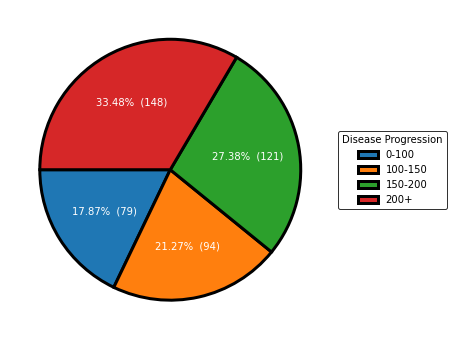

In [13]:
labels = ["0-100", "100-150", "150-200", "200+"]

# Create a pie chart to visualize the distribution of values in the 'Y_range' column
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

# Count the occurrences of each category in 'Y_range'
value_count = train["Y_range"].value_counts()

# Extract values for each category
data = [value_count[0], value_count[1], value_count[2], value_count[3]]

# Plot the pie chart
plt.pie(
    [train["Y_range"].value_counts(ascending=True).values[0],
     train["Y_range"].value_counts(ascending=True).values[1],
     train["Y_range"].value_counts(ascending=True).values[2],
     train["Y_range"].value_counts(ascending=True).values[3]],
    textprops=dict(size=10, color="white"),
    autopct=lambda p: '{:.2f}%  ({:,.0f})'.format(p, p * sum(data) / 100),
    startangle=180,
    wedgeprops=dict(edgecolor="black", linewidth=3)
)

# Add legend with labels and title
plt.legend(labels, title="Disease Progression", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="black")


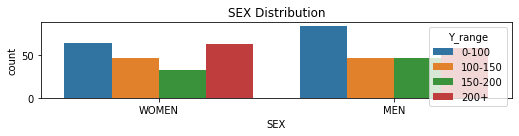

In [14]:
# Get numeric and categorical columns
num_cols, cat_cols = col_dtypes(train, target)

# Filter categorical columns with fewer than 10 unique values
cat_cols = train[cat_cols].columns[train[cat_cols].nunique() < 10]

# Set up the plotting area
plt.figure(figsize=(14, len(cat_cols) * 2))

# Iterate over categorical columns
for idx, column in enumerate(cat_cols):
    # Create subplots
    plt.subplot(len(cat_cols)//2 + 1, 2, idx + 1)
    
    # Create a count plot with hue as "Y_range"
    sns.countplot(hue="Y_range", x=column, data=train)
    
    # Set title
    plt.title(f"{column} Distribution")
    
    # Adjust layout for better visualization
    plt.tight_layout()

# Show the plots
plt.show()


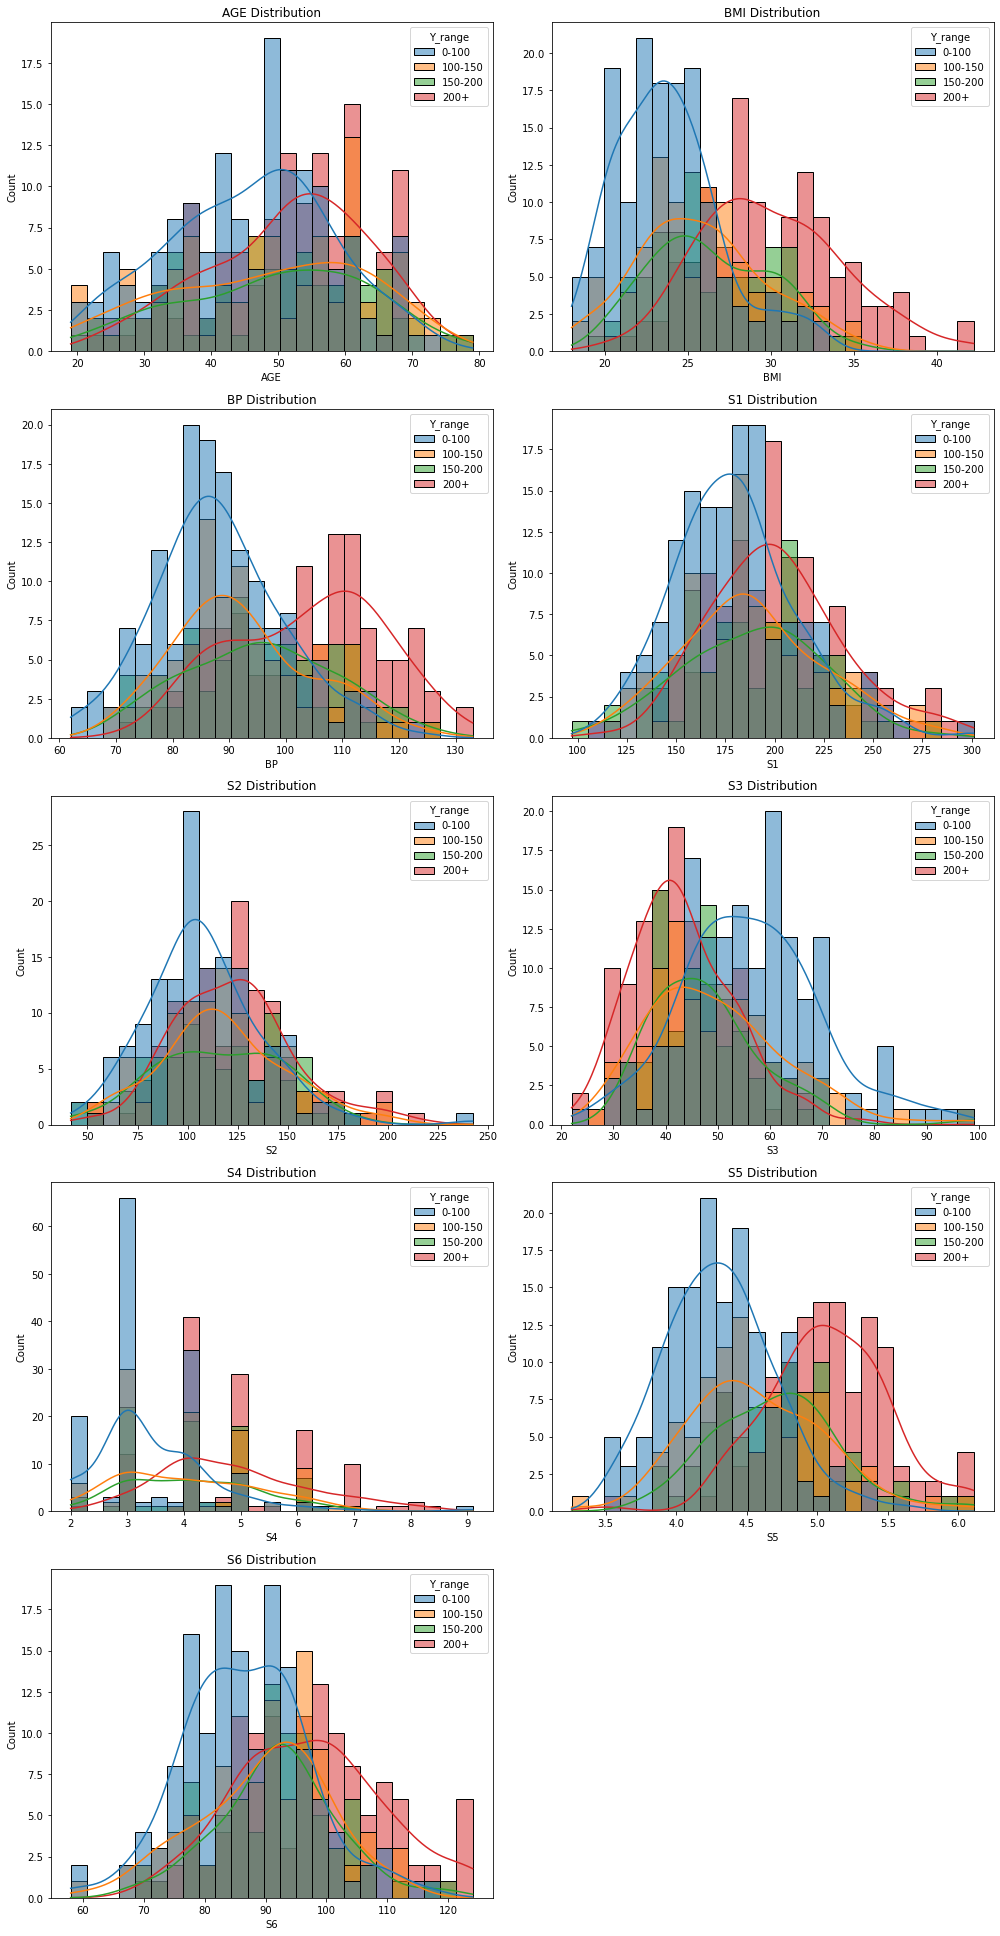

In [15]:
# Get numeric and categorical columns
num_cols, cat_cols = col_dtypes(train, target)

# Filter numeric columns with more than 25 unique values
num_cols = train[num_cols].columns[train[num_cols].nunique() > 25]

# Set up the plotting area
plt.figure(figsize=(14, len(num_cols) * 3))

# Iterate over numeric columns
for idx, column in enumerate(num_cols):
    # Create subplots
    plt.subplot(len(num_cols)//2 + 1, 2, idx + 1)
    
    # Create a histogram with hue as "Y_range"
    sns.histplot(x=column, hue="Y_range", data=train, bins=25, kde=True)
    
    # Set title
    plt.title(f"{column} Distribution")
    
    # Adjust layout for better visualization
    plt.tight_layout()

# Show the plots
plt.show()

In [16]:
# Import libraries for preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor


Correlation data

In [17]:
# Read the dataset from a file using tab as the separator
df = pd.read_csv('dataset.txt', sep="\t")

le = LabelEncoder() # Create a LabelEncoder instance

catcol = [col for col in df.columns if df[col].dtype == 'object'] # Identify categorical columns in the DataFrame
for col in catcol:
    df[col] = le.fit_transform(df[col]) # Use LabelEncoder to transform categorical columns to numerical labels


In [18]:
missing_data_df = df.isna().sum()
missing_data_df = missing_data_df[missing_data_df>0]
missing_data_df

Series([], dtype: int64)

In [19]:
# Calculate the correlation between columns and the "Y" column
df2 = df.corr().Y.sort_values(ascending=False).reset_index()
df2

,index,Y
0,Y,1.000000
1,BMI,0.586450
2,S5,0.565883
3,BP,0.441482
4,S4,0.430453
5,S6,0.382483
6,S1,0.212022
7,AGE,0.187889
8,S2,0.174054
9,SEX,0.043062


Text(0.5, 1.0, '\nHeatmap For Correlation\n')

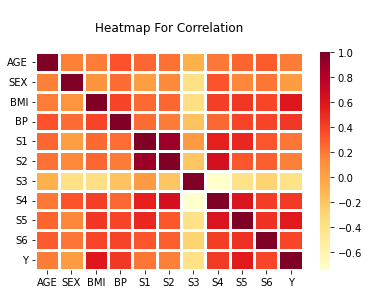

In [20]:
# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), cmap='YlOrRd', linewidths=3, edgecolor="#1c1c1c")

plt.title(f'\nHeatmap For Correlation\n') # Set the title for the heatmap


As can be seen in the heat map above, the measure of disease progression over one year (Y) is correlated with BMI whose value shows a range of 0.6 – 0.8. On the other hand, Y also correlates with blood pressure (BP), whose value shows a range of 0.4 - 0.6.

# Modelling

In [21]:
# Extract features and target variable
X = df.drop('Y', axis=1)
y = df['Y'].values.reshape(-1, 1)

# Import the necessary module from imblearn
import imblearn
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy="auto") # Create an instance of RandomOverSampler

X_sample, y_sample = oversample.fit_resample(X, y) # Apply the oversampling to the dataset


The goal of this oversampling technique is to balance the class distribution in the target variable 'Y' by generating synthetic examples of the minority class. 

This is particularly useful when dealing with imbalanced datasets where one class is significantly underrepresented compared to the other. The "auto" setting adjusts the sampling strategy based on the class distribution in the original dataset.

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

train_X,test_X,train_y,test_y=train_test_split(X_sample,y_sample,test_size=0.2,random_state=0)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)  # Adjust the number of splits as needed


In [23]:
catboost_model = CatBoostRegressor(silent=True)
catboost_model.fit(train_X,train_y)
cat_crosval=cross_val_score(catboost_model,X_sample, y_sample,cv=cv)
print('Crosval: ', cat_crosval.mean())

Crosval:  0.94312257197865


In [24]:
catboost_pred = catboost_model.predict(test_X)

catmae=mean_absolute_error(test_y,catboost_pred)
catmse=mean_squared_error(test_y,catboost_pred)
catrmse=mean_squared_error(test_y,catboost_pred,squared=False)
catmape=mean_absolute_percentage_error(test_y,catboost_pred)
catr2 = r2_score(test_y, catboost_pred)

print('MAE: ',catmae)
print('MSE: ',catmse)
print('RMSE: ',catrmse)
print('MAPE: ',catmape)
print('r2: ',catr2)

MAE:  9.232041622999862
MSE:  278.3435104332122
RMSE:  16.683630013675447
MAPE:  0.09992612774504303
r2:  0.9623767743099169


In [25]:
linreg=LinearRegression()
linreg.fit(train_X,train_y)
crosval_lin=cross_val_score(linreg,X_sample,y_sample,cv=cv)
print('Score: ', crosval_lin.mean())

Score:  0.5361051679059968


In [26]:
linregpred=linreg.predict(test_X)

linmae=mean_absolute_error(test_y,linregpred)
linmse=mean_squared_error(test_y,linregpred)
linrmse=mean_squared_error(test_y,linregpred,squared=False)
linmape=mean_absolute_percentage_error(test_y,linregpred)
linr2 = r2_score(test_y, linregpred)

print('MAE: ',linmae)
print('MSE: ',linmse)
print('RMSE: ',linrmse)
print('MAPE: ',linmape)
print('r2: ',linr2)

MAE:  46.42271095739471
MSE:  3382.13851682327
RMSE:  58.15615631060284
MAPE:  0.4671224024049326
r2:  0.542842006499384


In [27]:
dtr=DecisionTreeRegressor()
dtr.fit(train_X,train_y)
crosval_dtr=cross_val_score(dtr,X_sample,y_sample,cv=cv)
print('Score: ',crosval_dtr.mean())

Score:  0.9073751102966904


In [28]:
dtrpred=dtr.predict(test_X)
dtrmae=mean_absolute_error(test_y,dtrpred)
dtrmse=mean_squared_error(test_y,dtrpred)
dtrrmse=mean_squared_error(test_y,dtrpred,squared=False)
dtrmape=mean_absolute_percentage_error(test_y,dtrpred)
dtrr2 = r2_score(test_y,dtrpred)

print('MAE: ',dtrmae)
print('MSE: ',dtrmse)
print('RMSE: ',dtrrmse)
print('MAPE: ',dtrmape)
print('r2:',dtrr2)

MAE:  3.90272373540856
MSE:  327.88715953307394
RMSE:  18.107654722052605
MAPE:  0.03487254384759071
r2: 0.9556800423160821


In [29]:
rfc=RandomForestRegressor()
rfc.fit(train_X,train_y)
crosval_rfc = cross_val_score(rfc, X_sample, y_sample,cv=cv)
print('Score: ',crosval_rfc.mean())

Score:  0.9327704079131086


In [30]:
rfcpred=rfc.predict(test_X)
rfcmae=mean_absolute_error(test_y,rfcpred)
rfcmse=mean_squared_error(test_y,rfcpred)
rfcrmse=mean_squared_error(test_y,rfcpred,squared=False)
rfcmape=mean_absolute_percentage_error(test_y,rfcpred)
rfcr2 = r2_score(test_y,rfcpred)
print('MAE: ',rfcmae)
print('MSE: ',rfcmse)
print('RMSE: ',rfcrmse)
print('MAPE: ',rfcmape)
print('r2:',rfcr2)

MAE:  10.478988326848247
MSE:  396.51053852140075
RMSE:  19.912572373287205
MAPE:  0.10285091829894394
r2: 0.9464043352184903


In [31]:
results = pd.DataFrame([
    ['Catboost', catmape,catr2],
    ['Linear Regression',linmape,linr2],
    ['DecisionTreeRegressor',dtrmape,dtrr2],
    ["RandomForestRegressor",rfcmape,rfcr2]
], columns=['Model', 'MAPE', 'r2 Score'])

results.sort_values(by=['MAPE'],ascending=True)

,Model,MAPE,r2 Score
2,DecisionTreeRegressor,0.034873,0.955680
0,Catboost,0.099926,0.962377
3,RandomForestRegressor,0.102851,0.946404
1,Linear Regression,0.467122,0.542842


In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

compare = pd.DataFrame({...}): Creates a DataFrame named compare with three columns:
- 'Actual': Contains the actual values from the testing set (test_y).
- 'Predictions': Contains the predicted values from the decision tree model (dtrpred).
- 'Error percentage': Calculates the percentage error between predictions and actual values.

In [33]:
# Reshape test_y if needed
test_y = test_y.reshape(-1)

# Create a DataFrame for comparison
compare = pd.DataFrame({
    'Actual': test_y.flatten(),
    'Predictions': dtrpred.flatten(),
    'Error percentage': (dtrpred.flatten() - test_y.flatten()) / test_y.flatten() * 100
})
compare

,Actual,Predictions,Error percentage
0,150,150.0,0.000000
1,100,100.0,0.000000
2,51,51.0,0.000000
3,277,277.0,0.000000
4,306,306.0,0.000000
5,155,155.0,0.000000
6,230,230.0,0.000000
7,75,75.0,0.000000
8,127,127.0,0.000000
9,253,253.0,0.000000
